In [5]:
from google.colab import drive
import pandas as pd

# Google Drive'ınızı bağlayın
drive.mount('/content/drive')

# Load the Excel file
df = pd.read_excel('/content/drive/MyDrive/task1-dataset-1723704917.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

# Sipariş Miktarları
total_order_amount = df['order_size_TRY'].sum()
avg_order_amount = df['order_size_TRY'].mean()

# Ödeme Yöntemleri
payment_methods = df['preffered_payment_method'].value_counts(normalize=True)

# Seamless Siparişler
seamless_ratio = df['isSeamless'].mean()

# ContactCSAT ve SelfServiceCSAT
contact_csat_avg = df[df['isContact'] == 1]['ContactCSAT'].mean()
self_service_csat_avg = df[df['isSelfService'] == 1]['SelfServiceCSAT'].mean()

# NPS-Q-Score
nps_score_avg = df['NPS-Q-Score'].mean()

# Şikayet Türleri
complaint_types = df['contact_reason_CSRLevel3'].value_counts()
complaint_main_groups = df['contact_reason_MainGroup'].value_counts()

# Sonuçları yazdır
print("Toplam Sipariş Miktarı:", total_order_amount)
print("\n")
print("Ortalama Sipariş Miktarı:", avg_order_amount)
print("\n")
print("Ödeme Yöntemleri:", payment_methods)
print("\n")
print("Seamless Sipariş Oranı:", seamless_ratio)
print("\n")
print("ContactCSAT Ortalama Puanı:", contact_csat_avg)
print("\n")
print("SelfServiceCSAT Ortalama Puanı:", self_service_csat_avg)
print("\n")
print("NPS-Q-Score Ortalama Puanı:", nps_score_avg)
print("\n")
print("Şikayet Türleri:", complaint_types)
print("\n")
print("Şikayet Ana Grupları:", complaint_main_groups)


Toplam Sipariş Miktarı: 18309128


Ortalama Sipariş Miktarı: 366.18256


Ödeme Yöntemleri: preffered_payment_method
Online Payment       0.49692
Meal Card            0.20220
Credit/Debit Card    0.20082
Cash                 0.10006
Name: proportion, dtype: float64


Seamless Sipariş Oranı: 0.7462


ContactCSAT Ortalama Puanı: 2.726546906187625


SelfServiceCSAT Ortalama Puanı: 2.777319587628866


NPS-Q-Score Ortalama Puanı: 7.9221


Şikayet Türleri: contact_reason_CSRLevel3
-                                                37310
Complaint about severe delay                      1132
Wrong item                                        1072
Missing item                                      1067
Order marked as delivered but didn't receive       933
Complaint about moderate delay                     912
Restaurant hasn't started preparing the food       907
Request: accidental order                          774
Complaint about extreme delay                      773
Request: order is late-doe

In [7]:
print(df.head())
print(df.info())  # To see data types and check for missing values


   order_id          order_time order_city    order_area order_kitchen  \
0   9450303 2024-07-26 01:26:02   İstanbul    Sancaktepe      Kahvaltı   
1   3091190 2024-02-24 13:44:21   İstanbul          Şile         Pizza   
2   8040029 2024-01-06 19:26:41   İstanbul        Beykoz          Pide   
3   9828010 2024-08-23 16:32:36   İstanbul      Bakırköy        Burger   
4   7887475 2024-07-19 09:23:03   İstanbul  Büyükçekmece        Burger   

   order_restaurant_id  order_size_TRY preffered_payment_method  isSeamless  \
0               723542             103           Online Payment           1   
1               207622              80                     Cash           1   
2                35740             168                     Cash           1   
3               614173             104        Credit/Debit Card           1   
4               818521             415           Online Payment           1   

   isnotSeamless contact_reason_CSRLevel3 contact_reason_MainGroup  isContact  \

In [8]:
contact_channel = df[df['isContact'] == 1]
self_service_channel = df[df['isSelfService'] == 1]


In [9]:
contact_complaints = contact_channel['contact_reason_MainGroup'].value_counts()
self_service_complaints = self_service_channel['contact_reason_MainGroup'].value_counts()

print("Contact Channel Complaint Distribution:")
print(contact_complaints)

print("\nSelf-Service Channel Complaint Distribution:")
print(self_service_complaints)


Contact Channel Complaint Distribution:
contact_reason_MainGroup
Order Delay                            918
Cancellation Requests                  577
Missing Item & Wrong Item/Order        454
Product & Service Dissatisfaction      307
Adding Note & Delivery Instructions    149
Other Reasons                          100
Name: count, dtype: int64

Self-Service Channel Complaint Distribution:
contact_reason_MainGroup
Order Delay                            3739
Cancellation Requests                  2375
Missing Item & Wrong Item/Order        1791
Product & Service Dissatisfaction      1185
Adding Note & Delivery Instructions     642
Other Reasons                           453
Name: count, dtype: int64


In [10]:
avg_csat_contact = contact_channel['ContactCSAT'].mean()
avg_csat_self_service = self_service_channel['SelfServiceCSAT'].mean()

print(f"Average CSAT for Contact Channel: {avg_csat_contact}")
print(f"Average CSAT for Self-Service Channel: {avg_csat_self_service}")


Average CSAT for Contact Channel: 2.726546906187625
Average CSAT for Self-Service Channel: 2.777319587628866


In [11]:
avg_nps_contact = contact_channel['NPS-Q-Score'].mean()
avg_nps_self_service = self_service_channel['NPS-Q-Score'].mean()

print(f"Average NPS-Q-Score for Contact Channel: {avg_nps_contact}")
print(f"Average NPS-Q-Score for Self-Service Channel: {avg_nps_self_service}")


Average NPS-Q-Score for Contact Channel: 7.0359281437125745
Average NPS-Q-Score for Self-Service Channel: 6.84241531664212


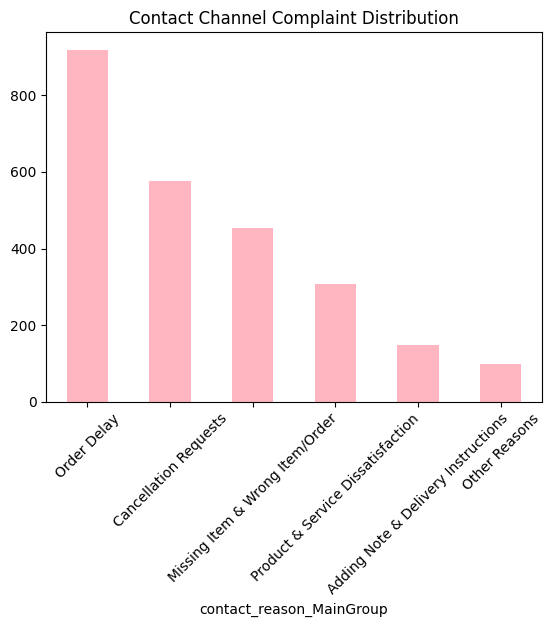

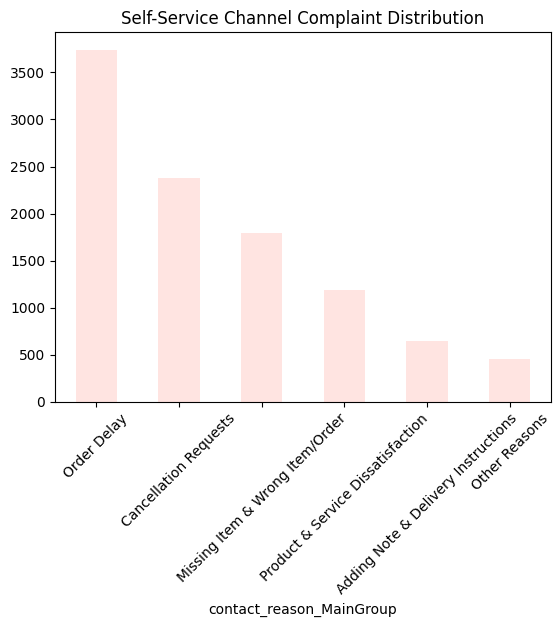

In [12]:
import matplotlib.pyplot as plt

# Plot complaint distribution comparison
# Contact ve Self-Service kanallarındaki şikayet dağılımı
contact_complaints.plot(kind='bar', title="Contact Channel Complaint Distribution", color='lightpink')
plt.xticks(rotation=45)
plt.show()

self_service_complaints.plot(kind='bar', title="Self-Service Channel Complaint Distribution", color='mistyrose')
plt.xticks(rotation=45)
plt.show()


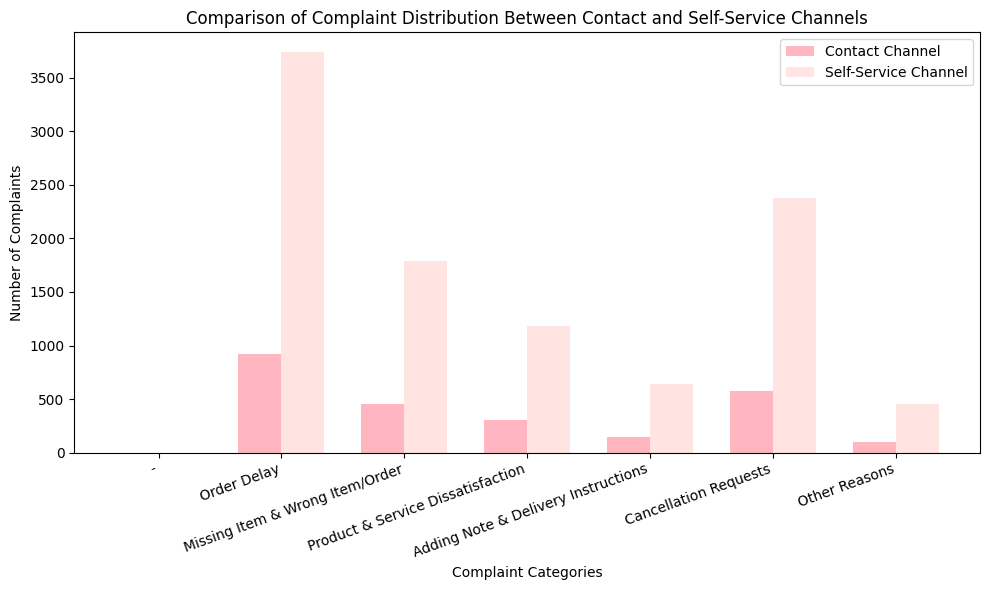

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Şikayet kategorilerini ve şikayet sayısını alma
categories = df['contact_reason_MainGroup'].unique()

contact_channel_counts = df[df['isContact'] == 1]['contact_reason_MainGroup'].value_counts().reindex(categories, fill_value=0).values
self_service_channel_counts = df[df['isSelfService'] == 1]['contact_reason_MainGroup'].value_counts().reindex(categories, fill_value=0).values

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(categories))

# Contact Channel için barlar
bars1 = ax.bar(index, contact_channel_counts, bar_width, label='Contact Channel', color='lightpink')

# Self-Service Channel için barlar
bars2 = ax.bar(index + bar_width, self_service_channel_counts, bar_width, label='Self-Service Channel', color='mistyrose')

# Eksen ve başlık ayarları
ax.set_xlabel('Complaint Categories')
ax.set_ylabel('Number of Complaints')
ax.set_title('Comparison of Complaint Distribution Between Contact and Self-Service Channels')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, rotation=20, ha='right')
ax.legend()

# Grafiği düzenleme ve gösterme
plt.tight_layout()
plt.show()


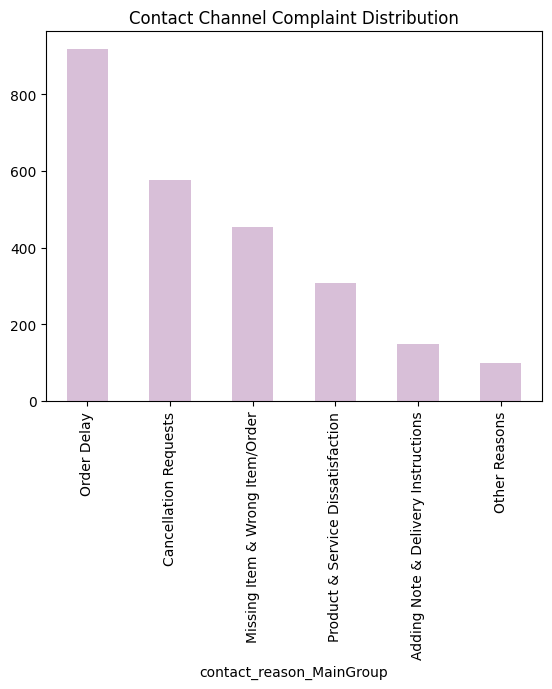

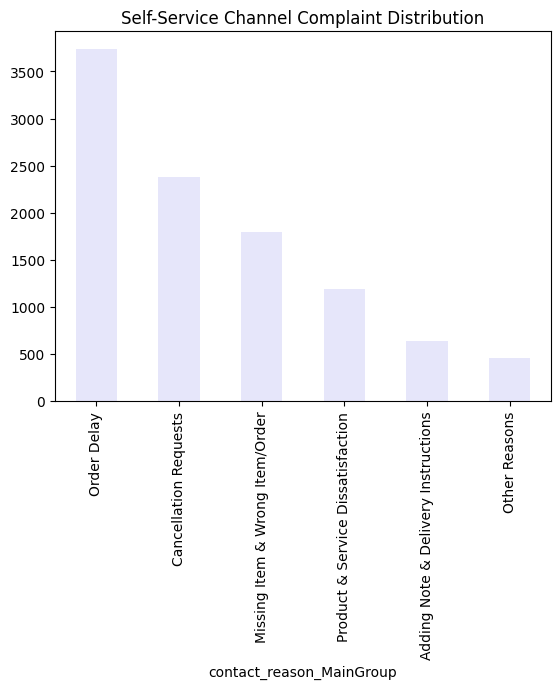

In [14]:
# Contact ve Self-Service kanallarındaki şikayet dağılımı
contact_complaints = df[df['isContact'] == 1]['contact_reason_MainGroup'].value_counts()
selfservice_complaints = df[df['isSelfService'] == 1]['contact_reason_MainGroup'].value_counts()

# Görselleştirme
contact_complaints.plot(kind='bar', color='Thistle', title='Contact Channel Complaint Distribution')
plt.show()

selfservice_complaints.plot(kind='bar', color='lavender', title='Self-Service Channel Complaint Distribution')
plt.show()


contact_reason_MainGroup
Order Delay                            3739
Cancellation Requests                  2375
Missing Item & Wrong Item/Order        1791
Product & Service Dissatisfaction      1185
Adding Note & Delivery Instructions     642
Other Reasons                           453
Name: count, dtype: int64


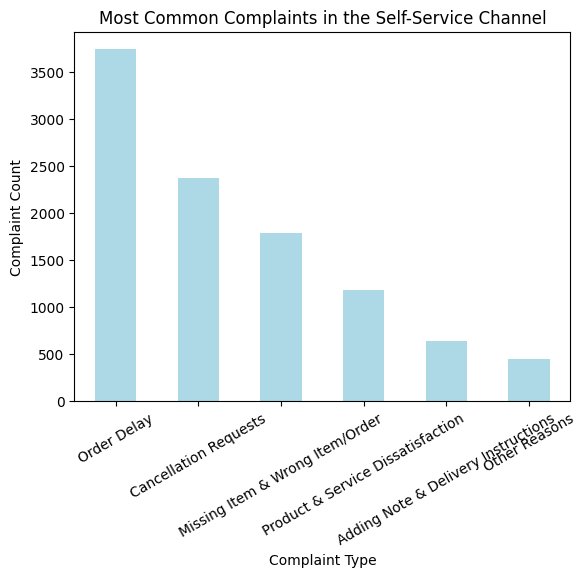

In [16]:
# Self-Service kanalında en yaygın şikayetler
self_service_complaints = df[df['isSelfService'] == 1]['contact_reason_MainGroup'].value_counts()
print(self_service_complaints)

# Görselleştirme: Self-Service Kanalındaki Şikayetler
self_service_complaints.plot(kind='bar', color='lightblue')
plt.title('Most Common Complaints in the Self-Service Channel')
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.xticks(rotation=30)
plt.show()


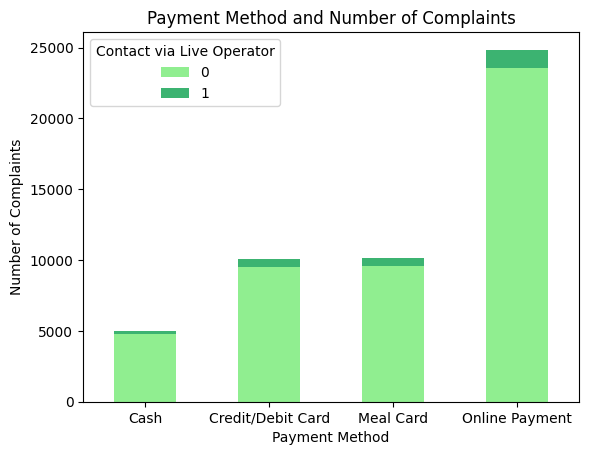

In [23]:
# Veriyi hazırlamak için pivot tablo oluşturma
df_pivot = df.pivot_table(index='preffered_payment_method', columns='isContact', aggfunc='size', fill_value=0)

# Yığılmış çubuk grafik oluşturma
df_pivot.plot(kind='bar', stacked=True, color=['lightgreen', 'mediumseagreen'])

# Grafik başlık ve etiketleri
plt.title('Payment Method and Number of Complaints')
plt.xlabel('Payment Method')
plt.ylabel('Number of Complaints')
plt.legend(title='Contact via Live Operator')
plt.xticks(rotation=0)
plt.show()


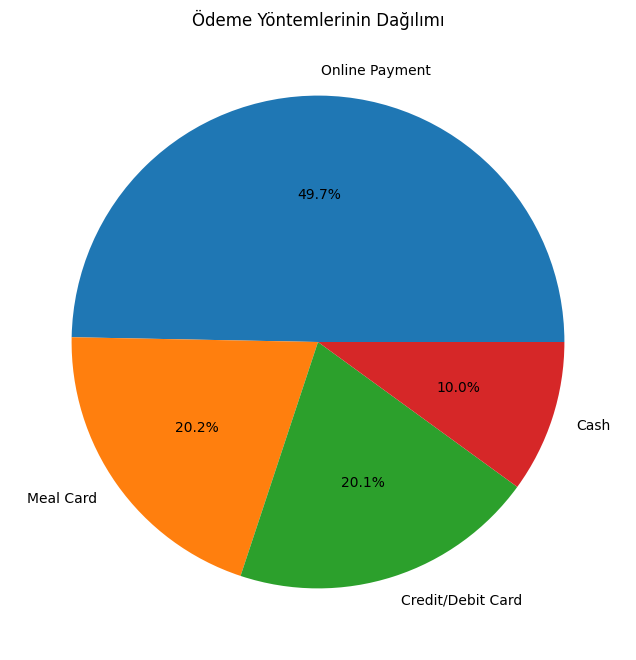

In [24]:
plt.figure(figsize=(8, 8))
df['preffered_payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Ödeme Yöntemlerinin Dağılımı')
plt.ylabel('')
plt.show()


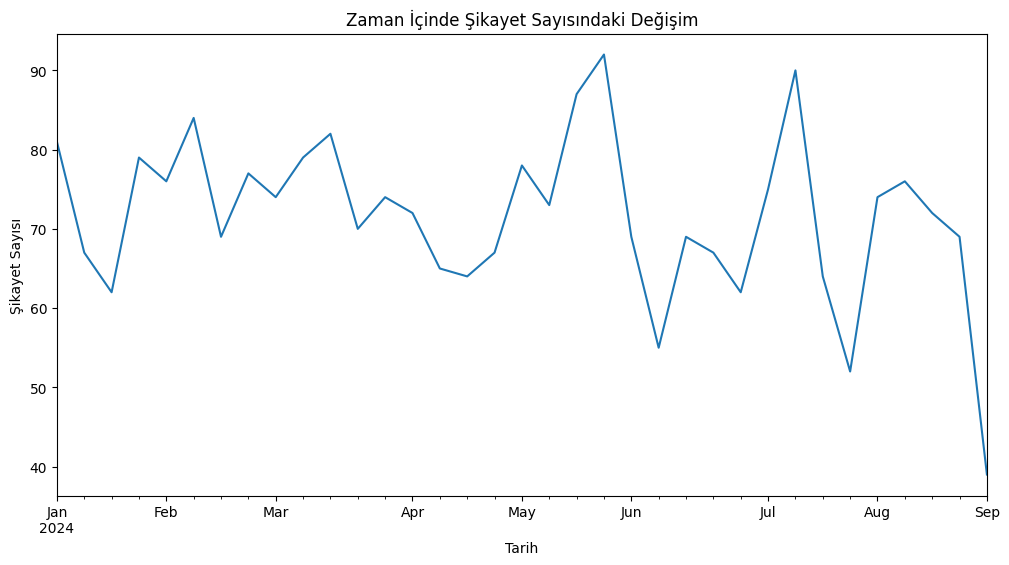

In [25]:
df['order_time'] = pd.to_datetime(df['order_time'])
df.set_index('order_time', inplace=True)
complaints_over_time = df.resample('W')['isContact'].sum()

plt.figure(figsize=(12, 6))
complaints_over_time.plot(kind='line')
plt.title('Zaman İçinde Şikayet Sayısındaki Değişim')
plt.xlabel('Tarih')
plt.ylabel('Şikayet Sayısı')
plt.show()



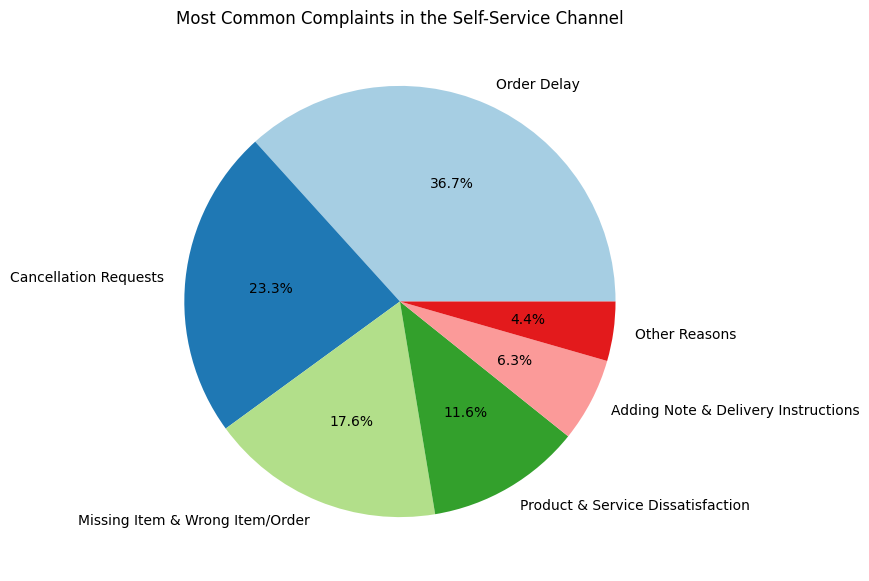

In [27]:
import matplotlib.pyplot as plt

# Self-Service kanalında en yaygın şikayetler
self_service_complaints = df[df['isSelfService'] == 1]['contact_reason_MainGroup'].value_counts()

# Görselleştirme: Self-Service Kanalındaki Şikayetler
plt.figure(figsize=(10, 7))
plt.pie(self_service_complaints, labels=self_service_complaints.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(self_service_complaints))))
plt.title('Most Common Complaints in the Self-Service Channel')
plt.show()


In [28]:
import pandas as pd


# Calculate average NPS and CSAT for Seamless and Non-Seamless orders
seamless_nps_avg = df[df['isSeamless'] == 1]['NPS-Q-Score'].mean()
non_seamless_nps_avg = df[df['isSeamless'] == 0]['NPS-Q-Score'].mean()

seamless_csat_avg = df[df['isSeamless'] == 1]['ContactCSAT'].mean()
non_seamless_csat_avg = df[df['isSeamless'] == 0]['ContactCSAT'].mean()

seamless_selfservice_csat_avg = df[df['isSeamless'] == 1]['SelfServiceCSAT'].mean()
non_seamless_selfservice_csat_avg = df[df['isSeamless'] == 0]['SelfServiceCSAT'].mean()

# Output the results
print(f"Average NPS for Seamless Orders: {seamless_nps_avg}")
print(f"Average NPS for Non-Seamless Orders: {non_seamless_nps_avg}")
print(f"Average Contact CSAT for Seamless Orders: {seamless_csat_avg}")
print(f"Average Contact CSAT for Non-Seamless Orders: {non_seamless_csat_avg}")
print(f"Average Self-Service CSAT for Seamless Orders: {seamless_selfservice_csat_avg}")
print(f"Average Self-Service CSAT for Non-Seamless Orders: {non_seamless_selfservice_csat_avg}")


Average NPS for Seamless Orders: 8.276333422674886
Average NPS for Non-Seamless Orders: 6.880614657210402
Average Contact CSAT for Seamless Orders: 0.0
Average Contact CSAT for Non-Seamless Orders: 0.5382190701339638
Average Self-Service CSAT for Seamless Orders: 0.0
Average Self-Service CSAT for Non-Seamless Orders: 2.229078014184397


In [30]:
# Group by the main complaint group and calculate the contact/self-service rates
complaint_analysis = df.groupby('contact_reason_MainGroup').agg(
    contact_count=('isContact', 'sum'),
    self_service_count=('isSelfService', 'sum'),
    total_count=('order_id', 'count')
)

complaint_analysis['contact_rate'] = complaint_analysis['contact_count'] / complaint_analysis['total_count']
complaint_analysis['self_service_rate'] = complaint_analysis['self_service_count'] / complaint_analysis['total_count']

# Sort by the highest contact rate
complaint_analysis = complaint_analysis.sort_values(by='contact_rate', ascending=False)

print(complaint_analysis[['contact_rate', 'self_service_rate']])


                                     contact_rate  self_service_rate
contact_reason_MainGroup                                            
Product & Service Dissatisfaction        0.205764           0.794236
Missing Item & Wrong Item/Order          0.202227           0.797773
Order Delay                              0.197123           0.802877
Cancellation Requests                    0.195461           0.804539
Adding Note & Delivery Instructions      0.188369           0.811631
Other Reasons                            0.180832           0.819168
-                                        0.000000           0.000000


In [32]:
# Add a new column for whether a complaint was made
df['complaint_made'] = df[['isContact', 'isSelfService']].sum(axis=1) > 0

# Calculate correlation
correlation = df[['order_size_TRY', 'complaint_made']].corr()

print(f"Correlation between order size and complaint frequency: {correlation.loc['order_size_TRY', 'complaint_made']}")


Correlation between order size and complaint frequency: 0.00260612833985907


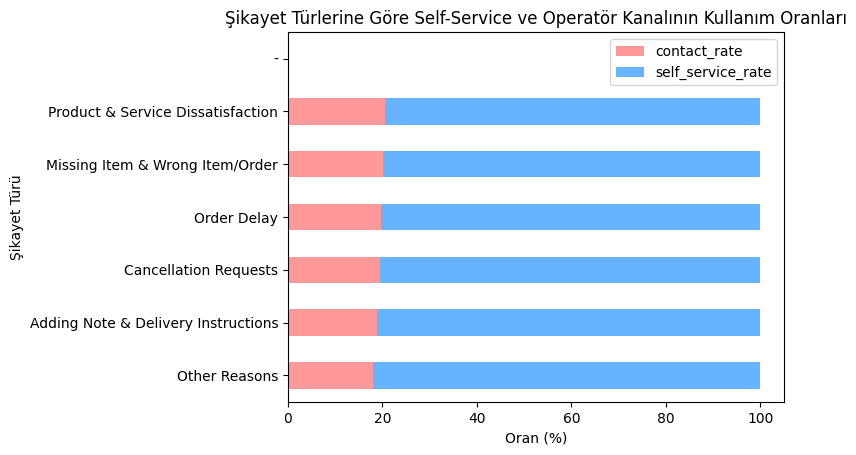

In [33]:
import pandas as pd
import matplotlib.pyplot as plt



# Şikayet türlerine göre gruplama ve kanal kullanım oranlarını hesaplama
complaint_analysis = df.groupby('contact_reason_MainGroup').agg(
    contact_count=('isContact', 'sum'),
    self_service_count=('isSelfService', 'sum'),
    total_count=('order_id', 'count')
)

complaint_analysis['contact_rate'] = (complaint_analysis['contact_count'] / complaint_analysis['total_count']) * 100
complaint_analysis['self_service_rate'] = (complaint_analysis['self_service_count'] / complaint_analysis['total_count']) * 100

# Verileri sıralama
complaint_analysis = complaint_analysis.sort_values(by='self_service_rate', ascending=False)

# Grafik oluşturma
complaint_analysis[['contact_rate', 'self_service_rate']].plot(kind='barh', stacked=True, color=['#ff9999','#66b3ff'])
plt.xlabel('Oran (%)')
plt.ylabel('Şikayet Türü')
plt.title('Şikayet Türlerine Göre Self-Service ve Operatör Kanalının Kullanım Oranları')
plt.show()


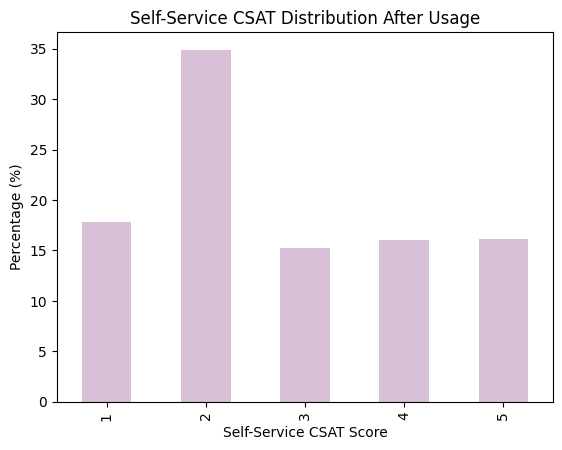

In [34]:
# Calculate Self-Service CSAT distribution
selfservice_csat_distribution = df[df['isSelfService'] == 1]['SelfServiceCSAT'].value_counts(normalize=True) * 100

# Create the plot
selfservice_csat_distribution.sort_index().plot(kind='bar', color='thistle')
plt.xlabel('Self-Service CSAT Score')
plt.ylabel('Percentage (%)')
plt.title('Self-Service CSAT Distribution After Usage')
plt.show()


2. Self-Service Kullanımı ve Müşteri Memnuniyeti (CSAT) İlişkisi
Amaç: Self-service kanalını kullanan müşterilerin memnuniyet düzeylerini inceleyerek, self-service kullanımının müşteri memnuniyetini nasıl etkilediğini anlamak.
Analiz Adımları:
Self-service kullanan müşterilerin CSAT skorlarını gruplandırın.
Self-service CSAT skorlarının dağılımını görselleştirin.
Python Kodu:
python
Kodu kopyala
# Self-Service CSAT dağılımını hesaplama
selfservice_csat_distribution = df[df['isSelfService'] == 1]['SelfServiceCSAT'].value_counts(normalize=True) * 100

# Grafik oluşturma
selfservice_csat_distribution.sort_index().plot(kind='bar', color='#66b3ff')
plt.xlabel('Self-Service CSAT Skoru')
plt.ylabel('Oran (%)')
plt.title('Self-Service Kullanımı Sonrası Müşteri Memnuniyeti (CSAT) Dağılımı')
plt.show()
Açıklama: Bu grafik, self-service kullanan müşterilerin memnuniyet düzeylerinin nasıl dağıldığını gösterir. Böylece, self-service kanalının müşteri memnuniyetine olan etkisini net bir şekilde anlayabilirsiniz.

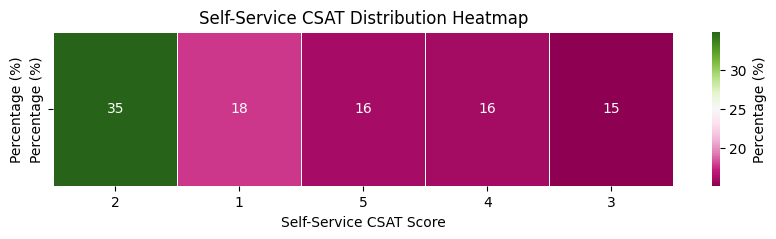

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# selfservice_csat_distribution verisini DataFrame'e dönüştürme
heatmap_data = selfservice_csat_distribution.reset_index()
heatmap_data.columns = ['Self-Service CSAT Score', 'Percentage (%)']

# Veriyi 2D formatında bir DataFrame oluşturma
# Burada, selfservice_csat_distribution verisini 2D formatına dönüştürmek için farklı bir yaklaşım kullanacağız
# Veriyi bir liste haline getiriyoruz ve bir DataFrame'e çeviriyoruz
heatmap_matrix = pd.DataFrame(heatmap_data['Percentage (%)']).T
heatmap_matrix.columns = heatmap_data['Self-Service CSAT Score']

# Isı haritası oluşturma
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_matrix, annot=True, cmap='PiYG', cbar=True, linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})
plt.xlabel('Self-Service CSAT Score')
plt.ylabel('Percentage (%)')
plt.title('Self-Service CSAT Distribution Heatmap')
plt.show()


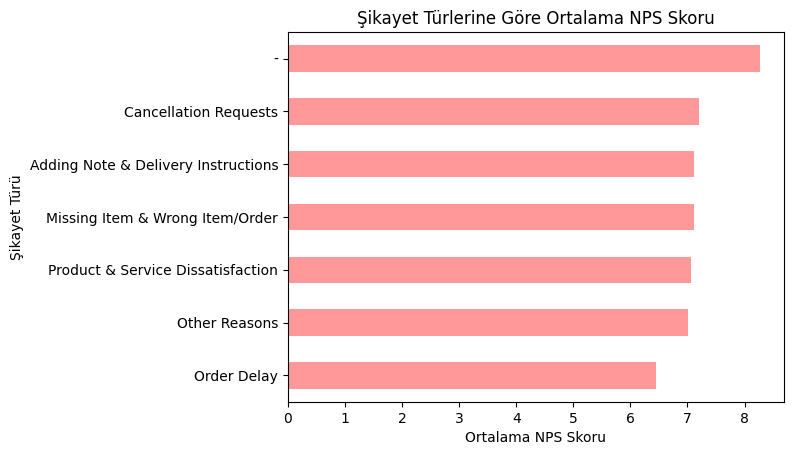

In [36]:
# Şikayet türlerine göre NPS skorlarının ortalamasını hesaplama
nps_by_complaint = df.groupby('contact_reason_MainGroup')['NPS-Q-Score'].mean().sort_values(ascending=True)

# Grafik oluşturma
nps_by_complaint.plot(kind='barh', color='#ff9999')
plt.xlabel('Ortalama NPS Skoru')
plt.ylabel('Şikayet Türü')
plt.title('Şikayet Türlerine Göre Ortalama NPS Skoru')
plt.show()


NPS Skoru ve Şikayet Türleri Arasındaki İlişki
Amaç: Farklı şikayet türlerine sahip müşterilerin NPS skorlarını inceleyerek, hangi şikayet türlerinin daha düşük NPS skorlarına yol açtığını belirlemek.
Analiz Adımları:
Şikayet türlerine göre NPS skorlarının ortalamasını hesaplayın.
NPS skorlarının şikayet türlerine göre dağılımını görselleştirin.
Python Kodu:
python
Kodu kopyala
# Şikayet türlerine göre NPS skorlarının ortalamasını hesaplama
nps_by_complaint = df.groupby('contact_reason_MainGroup')['NPS-Q-Score'].mean().sort_values(ascending=True)

# Grafik oluşturma
nps_by_complaint.plot(kind='barh', color='#ff9999')
plt.xlabel('Ortalama NPS Skoru')
plt.ylabel('Şikayet Türü')
plt.title('Şikayet Türlerine Göre Ortalama NPS Skoru')
plt.show()
Açıklama: Bu analiz, hangi şikayet türlerinin daha düşük NPS skorlarına yol açtığını belirlemenize yardımcı olur. Bu sayede, müşteri sadakatini artırmak için hangi alanlara odaklanmanız gerektiğini anlayabilirsiniz.

<ipython-input-39-1d604ec2b356>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  complaint_rate_by_order_size = df.groupby('order_size_range').agg(


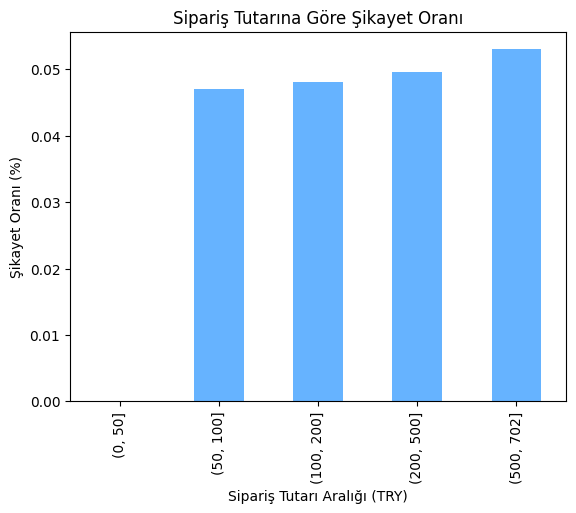

In [39]:
# Maksimum sipariş tutarını kontrol etme
max_order_size = df['order_size_TRY'].max()

# bins listesini yeniden tanımlama, eğer max_order_size, 1000'den küçükse 1000'i kaldırın
if max_order_size < 1000:
    bins = [0, 50, 100, 200, 500, max_order_size]
else:
    bins = [0, 50, 100, 200, 500, 1000, max_order_size]

# Sipariş tutarını belirli aralıklara bölme ve şikayet oranlarını hesaplama
df['order_size_range'] = pd.cut(df['order_size_TRY'], bins=bins)
complaint_rate_by_order_size = df.groupby('order_size_range').agg(
    complaint_rate=('isContact', 'mean')
)

# Şikayet oranlarını görselleştirme
complaint_rate_by_order_size['complaint_rate'].plot(kind='bar', color='#66b3ff')
plt.xlabel('Sipariş Tutarı Aralığı (TRY)')
plt.ylabel('Şikayet Oranı (%)')
plt.title('Sipariş Tutarına Göre Şikayet Oranı')
plt.show()


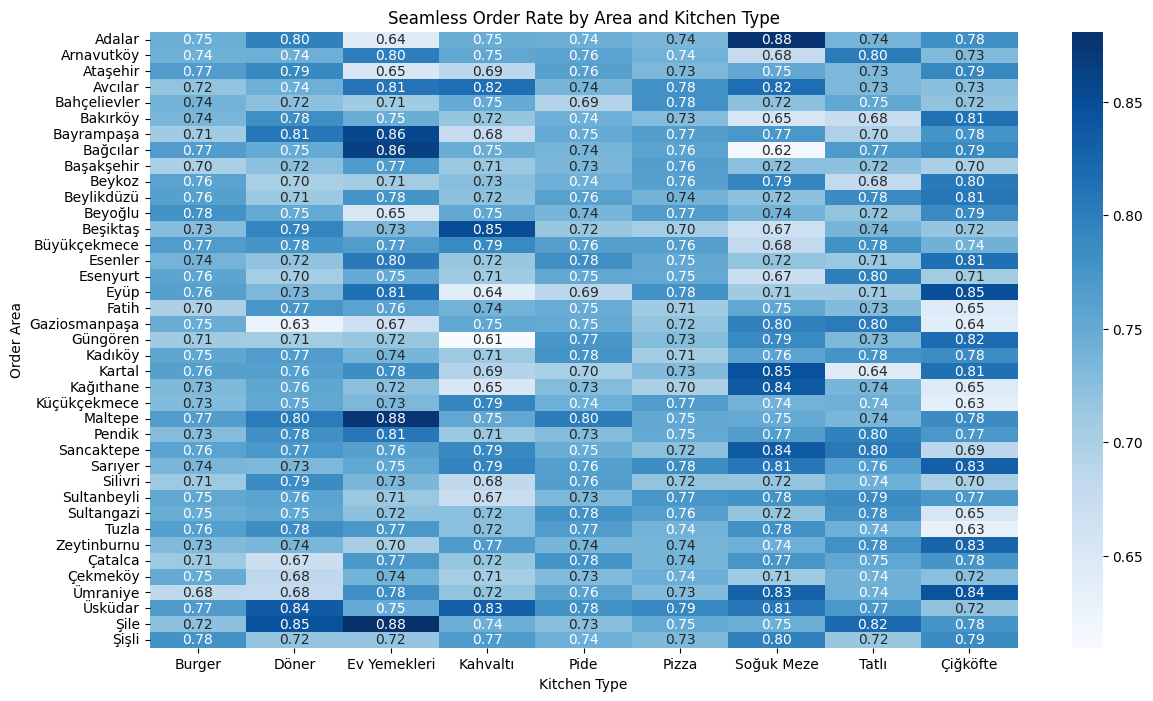

In [42]:
# Calculate seamless order rate by area and kitchen type
seamless_rate_area_kitchen = df.groupby(['order_area', 'order_kitchen'])['isSeamless'].mean().reset_index()

# Pivot the table for heatmap
pivot_table = seamless_rate_area_kitchen.pivot(index='order_area', columns='order_kitchen', values='isSeamless')

# Plotting the seamless order rate by area and kitchen type
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
plt.title('Seamless Order Rate by Area and Kitchen Type')
plt.xlabel('Kitchen Type')
plt.ylabel('Order Area')
plt.show()


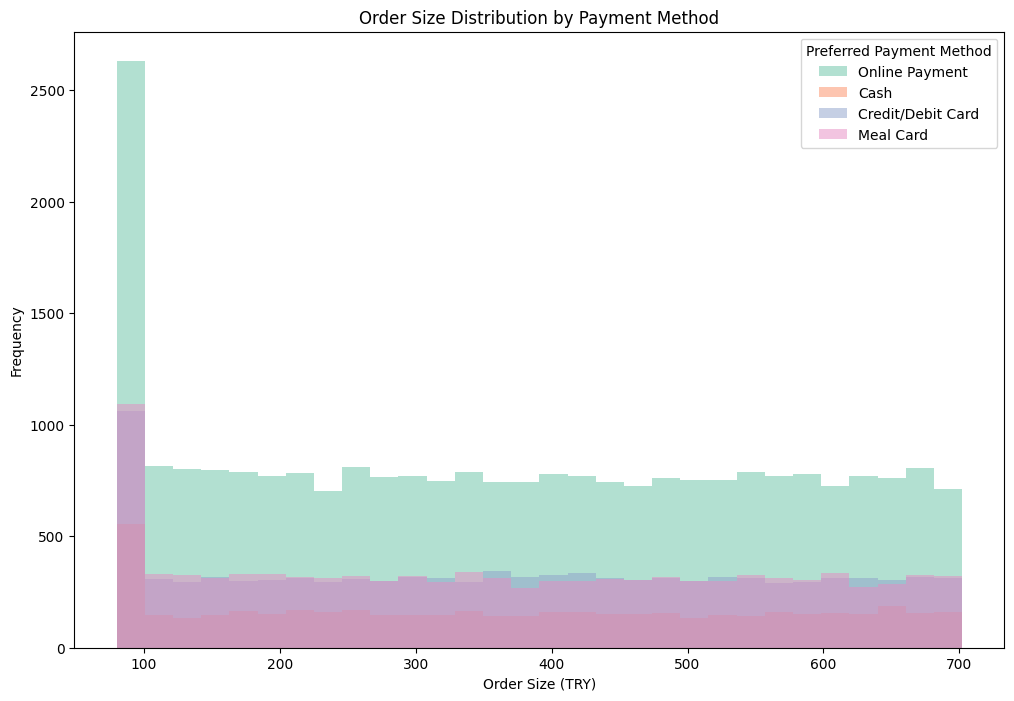

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Belirli renkler tanımlama (veya seaborn paletlerinden biri)
colors = sns.color_palette('Set2', len(df['preffered_payment_method'].unique()))

plt.figure(figsize=(12, 8))
for i, method in enumerate(df['preffered_payment_method'].unique()):
    subset = df[df['preffered_payment_method'] == method]
    plt.hist(subset['order_size_TRY'], bins=30, alpha=0.5, color=colors[i], label=method)

plt.title('Order Size Distribution by Payment Method')
plt.xlabel('Order Size (TRY)')
plt.ylabel('Frequency')
plt.legend(title='Preferred Payment Method')
plt.show()


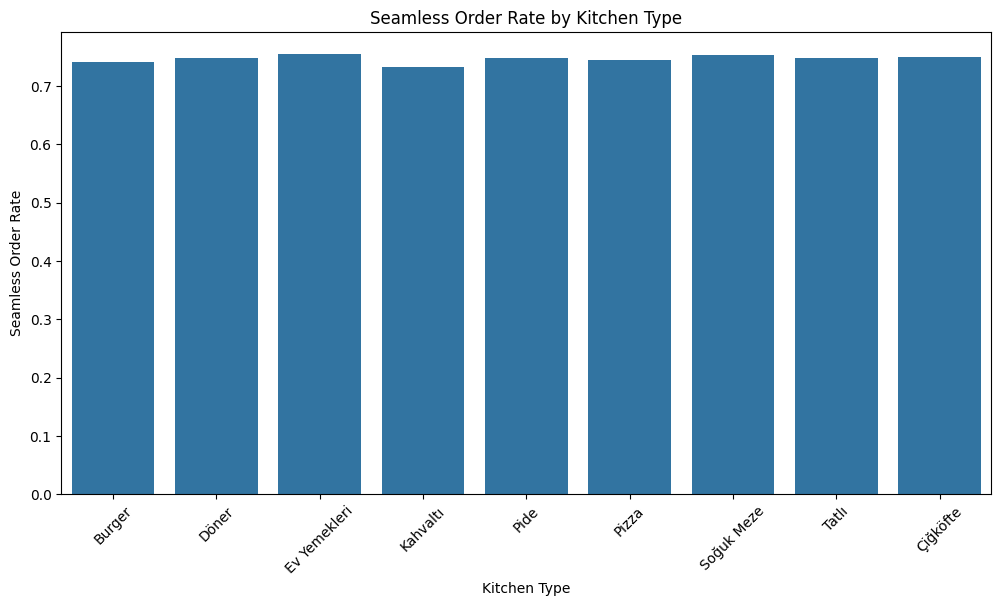

In [44]:
# Calculate seamless order rate by kitchen type
seamless_rate = df.groupby('order_kitchen')['isSeamless'].mean().reset_index()

# Plotting the seamless order rate by kitchen type
plt.figure(figsize=(12, 6))
sns.barplot(x='order_kitchen', y='isSeamless', data=seamless_rate)
plt.title('Seamless Order Rate by Kitchen Type')
plt.xlabel('Kitchen Type')
plt.ylabel('Seamless Order Rate')
plt.xticks(rotation=45)
plt.show()
